In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score ,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abodk222\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abodk222\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('tweet_emotions.csv')

In [3]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
df.shape

(40000, 3)

# Data Cleaning

In [7]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [8]:
df.drop(columns='tweet_id', inplace= True)

In [9]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [10]:
df.isnull().sum()

sentiment    0
content      0
dtype: int64

In [11]:
df.duplicated().sum()

91

In [12]:
df.drop_duplicates(keep='first', inplace= True)
df.duplicated().sum()

0

In [13]:
df.shape

(39909, 2)

In [14]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [15]:
df['sentiment'].value_counts()

neutral       8617
worry         8452
happiness     5194
sadness       5160
love          3801
surprise      2187
fun           1776
relief        1524
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [16]:
for i in df.index:
    if(df.loc[i,'sentiment'] in ['sadness','worry','hate','boredom','anger']):
        df.loc[i,'sentiment'] = 'negative'
    if(df.loc[i,'sentiment'] in ['happiness','love','fun','relief','enthusiasm']):
        df.loc[i,'sentiment'] = 'positive'

In [17]:
df.drop(df[df['sentiment'] == 'empty'].index, inplace = True)
df.drop(df[df['sentiment'] == 'surprise'].index, inplace = True)
df['sentiment'].value_counts()

negative    15224
positive    13054
neutral      8617
Name: sentiment, dtype: int64

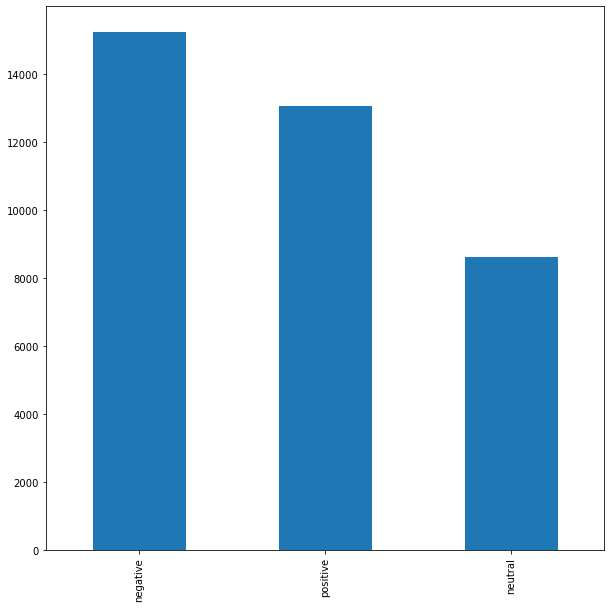

In [18]:
plt.figure(figsize=(10,10))
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [19]:
encoder = LabelEncoder()

In [20]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [21]:
df.head()

,sentiment,content
1,0,Layin n bed with a headache ughhhh...waitin o...
2,0,Funeral ceremony...gloomy friday...
3,2,wants to hang out with friends SOON!
4,1,@dannycastillo We want to trade with someone w...
5,0,Re-pinging @ghostridah14: why didn't you go to...


In [22]:
stemmer = SnowballStemmer(language='english')

In [23]:
def tpp(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    alfa_num = []
    for token in text:
        if token.isalnum():
            alfa_num.append(token)

    text = alfa_num[:]
    alfa_num.clear()

    for token in text:
        if token not in stopwords.words('english'):
            alfa_num.append(token)

    text = alfa_num[:]
    alfa_num.clear()
    
    for token in text:
        alfa_num.append(stemmer.stem(token))

    text = alfa_num[:]
    alfa_num.clear()
    return " ".join(text)

In [24]:
df['clean_text'] = df['content'].apply(tpp)

In [25]:
df.head(4)

,sentiment,content,clean_text
1,0,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh waitin call
2,0,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday
3,2,wants to hang out with friends SOON!,want hang friend soon
4,1,@dannycastillo We want to trade with someone w...,dannycastillo want trade someon houston ticket...


In [26]:
mask = np.array(Image.open("twitterlogooutline_80724.png"))
w_cloud = WordCloud(width = 700, height= 500, random_state= 8, background_color= 'white',colormap='winter_r',mask=mask)

In [27]:
cld = w_cloud.generate(df['clean_text'].str.cat(sep = ' '))

## Word Cloud of the dataset

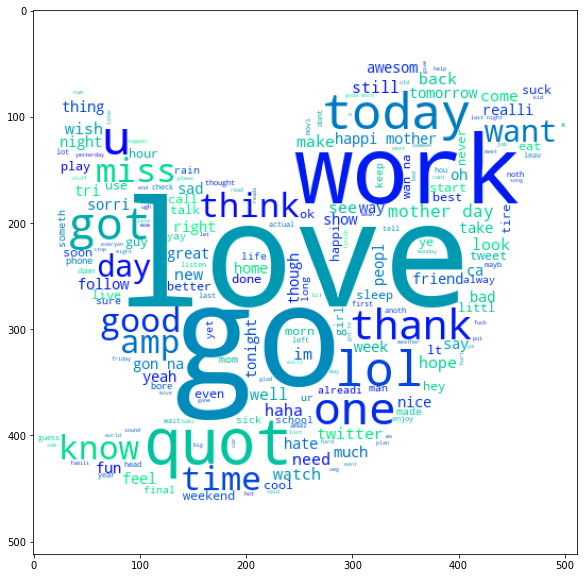

In [28]:
plt.figure(figsize=(20,10))
plt.imshow(cld)

## Negative Emotions :

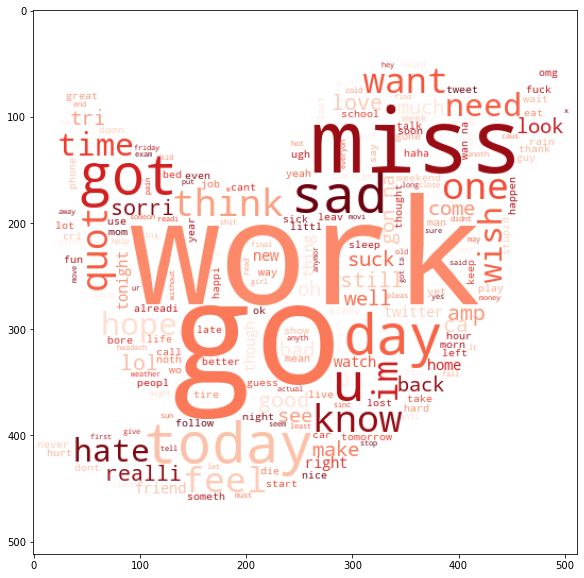

In [29]:
w_cloud = WordCloud(width = 700, height= 500, random_state= 8, background_color= 'white',colormap='Reds',mask=mask)
cl_neg = w_cloud.generate(df[df['sentiment']== 0]['clean_text'].str.cat(sep = ' '))
plt.figure(figsize=(15,10))
plt.imshow(cl_neg)

## Neutral Emotions :

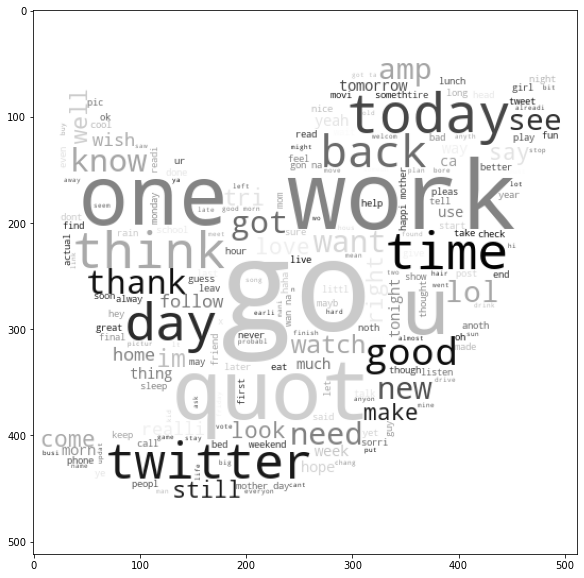

In [30]:
w_cloud = WordCloud(width = 700, height= 500, random_state= 8, background_color= 'white',colormap='gray_r',mask=mask)
cl_neut = w_cloud.generate(df[df['sentiment']== 1]['clean_text'].str.cat(sep = ' '))
plt.figure(figsize=(15,10))
plt.imshow(cl_neut)

## Positive emotions :

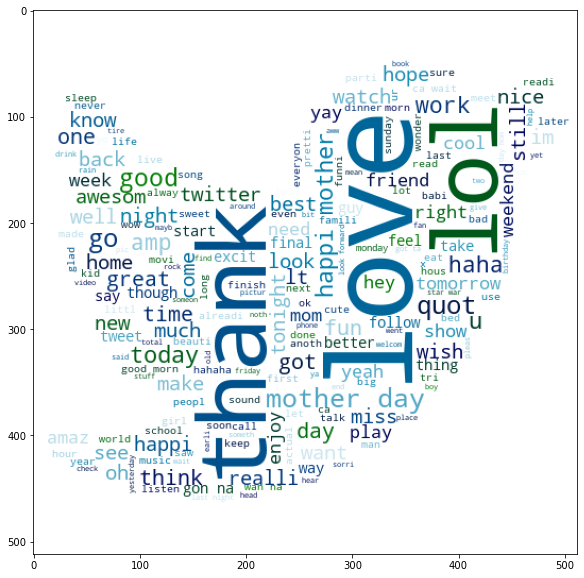

In [31]:
w_cloud = WordCloud(width = 700, height= 500, random_state= 8, background_color= 'white',colormap='ocean_r',mask=mask)
cl_post = w_cloud.generate(df[df['sentiment']== 2]['clean_text'].str.cat(sep = ' '))
plt.figure(figsize=(15,10))
plt.imshow(cl_post)

# Model Building

In [32]:
df=df.drop('content',axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36895 entries, 1 to 39999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   36895 non-null  int32 
 1   clean_text  36895 non-null  object
dtypes: int32(1), object(1)
memory usage: 720.6+ KB


In [34]:
df['sentiment'].value_counts()

0    15224
2    13054
1     8617
Name: sentiment, dtype: int64

In [35]:
df.sample(10)

,sentiment,clean_text
22852,2,good morn yes
34580,2,happi made 23 necklac 24 hour lol happi mother...
5455,1,present finish bust ankl stupido model broke c...
1021,0,noth right tire want sleep clean pretti good p...
36641,1,da time gtalk pls make follow count 600
20991,2,go shop place thingi brb laterz
16797,0,mitchelmusso wish could call cost lot parent w...
29516,1,looov comedian obama hahaha man love event som...
38350,2,mention spend time two bffs total worth
13149,1,gone


In [36]:
vec1 = CountVectorizer()
vec2 = TfidfVectorizer()

In [37]:
X1 = vec1.fit_transform(df['clean_text']).toarray()

In [38]:
X2 = vec2.fit_transform(df['clean_text']).toarray()

In [39]:
y = df['sentiment'].values

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 8)

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 8)

In [42]:
mnb1 = MultinomialNB()

In [43]:
mnb1.fit(X1_train, y1_train)

MultinomialNB()

In [44]:
y1_pred_mnb = mnb1.predict(X1_test)

In [45]:
accuracy_score(y1_test, y1_pred_mnb) # Using the Counter Vectorizer

0.5880200569182816

In [46]:
mnb2 = MultinomialNB()

In [47]:
mnb2.fit(X2_train, y2_train)

MultinomialNB()

In [48]:
y2_pred_mnb = mnb2.predict(X2_test)

In [49]:
accuracy_score(y2_test, y2_pred_mnb) # Using the Tfidf Vectorizer

0.574468085106383

# Compute confusion matrix to evaluate the accuracy of a classification.

In [50]:
c1=confusion_matrix(y1_test,y1_pred_mnb) # Using the Counter Vectorizer

In [51]:
c2=confusion_matrix(y2_test,y2_pred_mnb) # Using the Tfidf Vectorizer

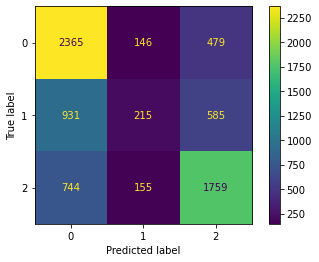

In [52]:
cm1_display = ConfusionMatrixDisplay(confusion_matrix = c1)
cm1_display.plot()
plt.show()

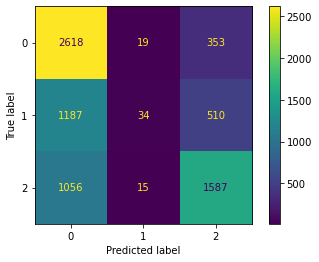

In [53]:
cm2_display = ConfusionMatrixDisplay(confusion_matrix = c2)
cm2_display.plot()
plt.show()

# Compute the F1 score

### The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

In [54]:
f1_score(y1_test,y1_pred_mnb,average=None) # Using the Counter Vectorizer

array([0.67283073, 0.19136627, 0.64185368])

In [55]:
f1_score(y2_test,y2_pred_mnb,average=None) # Using the Tfidf Vectorizer

array([0.66692141, 0.03779878, 0.62137823])